<a href="https://colab.research.google.com/github/mariyam-ahmed/portfolio/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#removing unnecessary columns
df = df.drop('patient_nbr', axis=1)
df = df.drop('encounter_id', axis=1)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#printing the unique values and the data type for each feature
for col in df:
    print(df[col].name, df[col].dtype)
    print("Unique:", len(df[col].unique()))
    print(df[col].unique())
    print("-------------------------------------------------------------------------------------------------------")

race object
Unique: 6
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
-------------------------------------------------------------------------------------------------------
gender object
Unique: 3
['Female' 'Male' 'Unknown/Invalid']
-------------------------------------------------------------------------------------------------------
age object
Unique: 10
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
-------------------------------------------------------------------------------------------------------
weight object
Unique: 10
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
-------------------------------------------------------------------------------------------------------
admission_type_id int64
Unique: 8
[6 1 2 3 4 5 8 7]
-------------------------------------------------------------------------------------------------------
discharge_disposition_id int64


### Plots of Target Variable

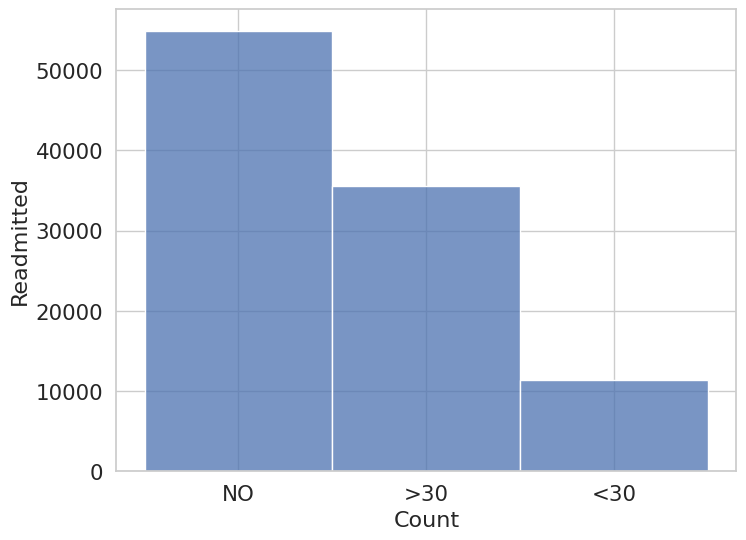

In [ ]:
# Draw histogram of 'Readmitted'
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df['readmitted'])
plt.xlabel("Count", fontsize=16)
plt.ylabel("Readmitted", fontsize=16)
plt.show()
plt.close()

#Pre-processing

### Missing Values
Missing values in our dataset impact the predictive power of our model.

In [ ]:
df.replace('?', np.nan, inplace=True) #this dataset uses ? to indicate missing data

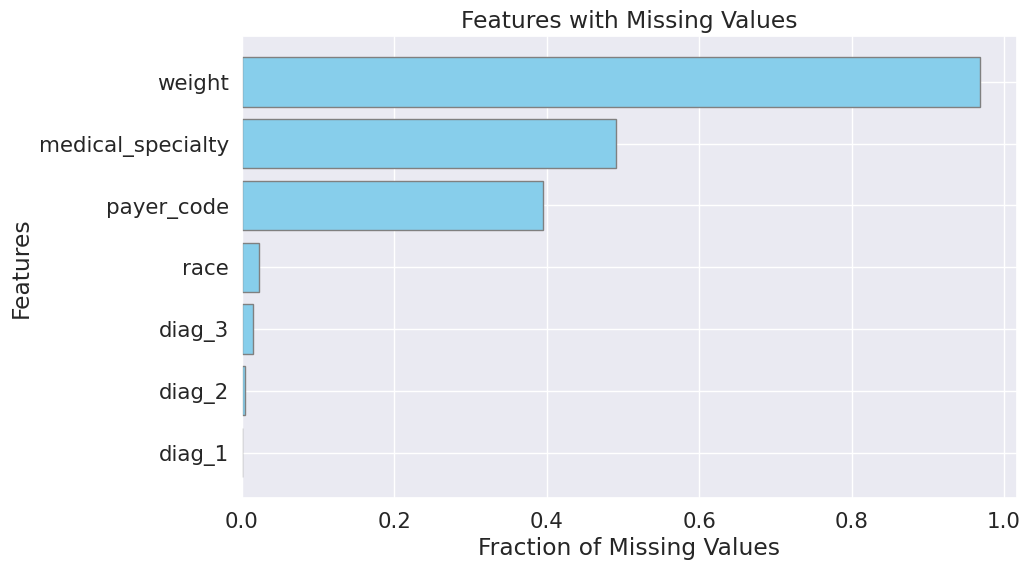

In [ ]:
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#drop columns for too many missing values or too many categories
df = df.drop(columns = ['weight','medical_specialty','payer_code', 'diag_1', 'diag_2', 'diag_3'])
df = df.dropna()

In [ ]:
Y = df['readmitted']
df = df.drop('readmitted', axis=1)

In [ ]:
#converting categorical variables to obj data type
df['admission_type_id'] = df['admission_type_id'].astype('object')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('object')
df['admission_source_id'] = df['admission_source_id'].astype('object')

##Mapping variables

Variables with non-numerical values may be either ordinal or nominal. Ordinal variables represent values that have an inherent order, and are thus mapped to integer values "1, 2, 3.." whereas nominal variables do not have an order, and thus are encoded, to give each variable value an equal weightage.

### Convert Non-Ordinal Features to One-Hot-Encoding



In [ ]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol            

In [ ]:
# Find remaining features of string type
string_columns = [col for col in df.columns if df[col].dtype == 'object']

# Convert string columns to one-hot encodings
df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)

df

<ipython-input-54-fdd1042b26d4>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)
<ipython-input-54-fdd1042b26d4>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)
<ipython-input-54-fdd1042b26d4>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,41,0,1,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,0
1,3,59,0,18,0,0,0,9,0,0,...,0,1,0,1,1,0,1,0,0,1
2,2,11,5,13,2,0,1,6,1,0,...,0,1,0,1,1,0,0,1,0,1
3,2,44,1,16,0,0,0,7,0,0,...,0,1,0,1,1,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,...,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,1,0,...,0,1,0,1,1,0,1,0,0,1
101762,5,33,3,18,0,0,1,9,1,0,...,0,1,0,1,1,0,0,1,0,1
101763,1,53,0,9,1,0,0,13,0,0,...,0,1,0,1,1,0,1,0,0,1
101764,10,45,2,21,0,0,1,9,0,0,...,0,1,0,1,1,0,1,0,0,1


### Drop Highly Correlated Features

Correlated features essentially convey the same information, which can lead to model redundancy. Removing them reduces the complexity of the model and can make it more interpretable.


In [ ]:
# Set the correlation threshold for considering features as highly correlated
correlation_threshold = 0.95

# Iterate through pairs of features and measure the correlation
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        correlation = df[feature1].corr(df[feature2])

        # Check if the correlation is above the threshold
        if abs(correlation) > correlation_threshold:
            print(f'High correlation between {feature1} and {feature2} (Correlation: {correlation:.2f})')

            # # Plot the highly correlated features
            # sns.scatterplot(x=feature1, y=feature2, data=df)
            # plt.xlabel(feature1)
            # plt.ylabel(feature2)
            # plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
            # plt.show()

High correlation between gender_Female and gender_Male (Correlation: -1.00)
High correlation between nateglinide_No and nateglinide_Steady (Correlation: -0.98)
High correlation between chlorpropamide_No and chlorpropamide_Steady (Correlation: -0.96)
High correlation between acetohexamide_No and acetohexamide_Steady (Correlation: -1.00)
High correlation between tolbutamide_No and tolbutamide_Steady (Correlation: -1.00)
High correlation between pioglitazone_No and pioglitazone_Steady (Correlation: -0.97)
High correlation between rosiglitazone_No and rosiglitazone_Steady (Correlation: -0.98)
High correlation between acarbose_No and acarbose_Steady (Correlation: -0.98)
High correlation between troglitazone_No and troglitazone_Steady (Correlation: -1.00)
High correlation between tolazamide_No and tolazamide_Steady (Correlation: -0.99)
High correlation between glyburide-metformin_No and glyburide-metformin_Steady (Correlation: -0.99)
High correlation between glipizide-metformin_No and glipiz

Several of the above variables, from their descriptions, convey the same information, so we remove them.

In [ ]:
df = df.drop(columns = 'gender_Male')
df = df.drop(columns = 'acetohexamide_Steady')
df = df.drop(columns = 'tolbutamide_Steady')
df = df.drop(columns = 'troglitazone_Steady')
df = df.drop(columns = 'glipizide-metformin_Steady')
df = df.drop(columns = 'glimepiride-pioglitazone_Steady')
df = df.drop(columns = 'metformin-pioglitazone_Steady')
df = df.drop(columns = 'diabetesMed_Yes')
df = df.drop(columns = 'change_No')


In [ ]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_Ch,diabetesMed_No
0,1,41,0,1,0,0,0,1,0,0,...,0,1,0,0,1,1,1,1,0,1
1,3,59,0,18,0,0,0,9,0,0,...,0,1,0,0,1,1,1,1,1,0
2,2,11,5,13,2,0,1,6,1,0,...,0,1,0,0,1,1,1,1,0,0
3,2,44,1,16,0,0,0,7,0,0,...,0,1,0,0,1,1,1,1,1,0
4,1,51,0,8,0,0,0,5,0,0,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,1,0,...,0,1,0,0,1,1,1,1,1,0
101762,5,33,3,18,0,0,1,9,1,0,...,0,1,0,0,1,1,1,1,0,0
101763,1,53,0,9,1,0,0,13,0,0,...,0,1,0,0,1,1,1,1,1,0
101764,10,45,2,21,0,0,1,9,0,0,...,0,1,0,0,1,1,1,1,1,0


#Modelling

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 150 columns):
 #    Column                       Dtype
---   ------                       -----
 0    time_in_hospital             int64
 1    num_lab_procedures           int64
 2    num_procedures               int64
 3    num_medications              int64
 4    number_outpatient            int64
 5    number_emergency             int64
 6    number_inpatient             int64
 7    number_diagnoses             int64
 8    race_AfricanAmerican         uint8
 9    race_Asian                   uint8
 10   race_Caucasian               uint8
 11   race_Hispanic                uint8
 12   race_Other                   uint8
 13   gender_Female                uint8
 14   gender_Unknown/Invalid       uint8
 15   age_[0-10)                   uint8
 16   age_[10-20)                  uint8
 17   age_[20-30)                  uint8
 18   age_[30-40)                  uint8
 19   age_[40-50)           

#Modelling

In [ ]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

###KNN

Text(0, 0.5, 'accuracy')

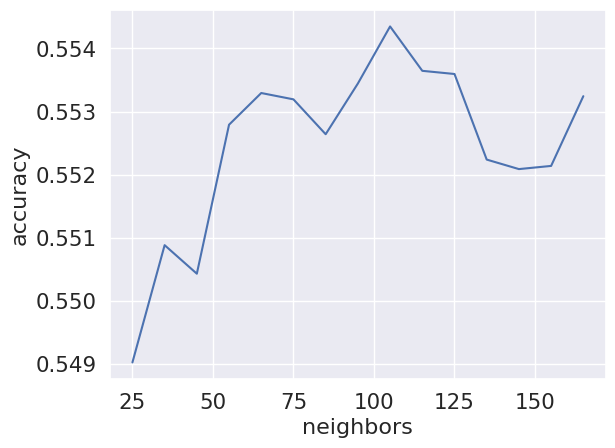

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

C = np.arange(25, 175, 10)
scores = []

for choice in C:
  knn = KNeighborsClassifier(n_neighbors=choice, weights = 'distance')
  knn = knn.fit(X_train,y_train)
  score = knn.score(X_valid,y_valid)
  scores.append(score)

  if score >= max(scores):
    knn_final = knn

plt.plot(C,scores)
plt.xlabel('neighbors', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)

In [ ]:
print(classification_report(y_test, knn_final.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.25      0.00      0.00      2272
         >30       0.49      0.15      0.22      6970
          NO       0.56      0.94      0.70     10657

    accuracy                           0.55     19899
   macro avg       0.44      0.36      0.31     19899
weighted avg       0.50      0.55      0.46     19899



In [ ]:
knn_final.score(X_test, y_test)

0.5547514950500025

###Decision Tree

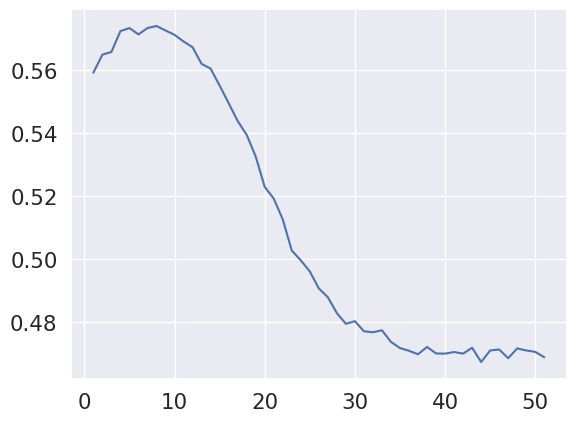

In [ ]:
from sklearn.tree import DecisionTreeClassifier

C = np.arange(1, 52)

scores = []

for choice in C:
  DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = choice)
  DT = DT.fit(X_train,y_train)
  score = DT.score(X_valid,y_valid)
  scores.append(score)

  if score >= max(scores):
    DT_final = DT



plt.plot(C,scores)

In [ ]:
DT_final.get_depth()

14

In [ ]:
print(classification_report(y_test, DT_final.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.44      0.02      0.04      2272
         >30       0.50      0.30      0.38      6970
          NO       0.60      0.87      0.71     10657

    accuracy                           0.57     19899
   macro avg       0.51      0.40      0.38     19899
weighted avg       0.54      0.57      0.52     19899



###SVM: rbf

In [ ]:
from sklearn import svm


svm_model = svm.SVC(C = 1, gamma='scale',
            class_weight='balanced')
svm_model = svm_model.fit(X_train, y_train)
svm_model.score(X_valid, y_valid)

0.5216342529775365

In [ ]:
print(classification_report(y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.20      0.33      0.25      2272
         >30       0.51      0.26      0.35      6970
          NO       0.63      0.73      0.68     10657

    accuracy                           0.52     19899
   macro avg       0.44      0.44      0.42     19899
weighted avg       0.54      0.52      0.51     19899



###SVM: linear

In [ ]:
from sklearn import svm

svm_model = svm.LinearSVC(C = 0.1, class_weight='balanced')
svm_model_lin = svm_model.fit(X_train, y_train)
svm_model_lin.score(X_valid, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5594753505201266

In [ ]:
print(classification_report(y_test, svm_model_lin.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.27      0.07      0.11      2272
         >30       0.49      0.15      0.23      6970
          NO       0.57      0.92      0.71     10657

    accuracy                           0.55     19899
   macro avg       0.45      0.38      0.35     19899
weighted avg       0.51      0.55      0.47     19899



###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 5000, class_weight = 'balanced')
lr.fit(X_train, y_train)
lr.score(X_valid, y_valid)

0.5004271571435751

In [ ]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.21      0.41      0.28      2272
         >30       0.46      0.38      0.42      6970
          NO       0.67      0.60      0.63     10657

    accuracy                           0.50     19899
   macro avg       0.44      0.47      0.44     19899
weighted avg       0.54      0.50      0.52     19899



###Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0).fit(X_train, y_train)
GB.score(X_valid, y_valid)

0.5299261269410523

In [ ]:
print(classification_report(y_test, GB.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.21      0.11      0.14      2272
         >30       0.43      0.41      0.42      6970
          NO       0.61      0.68      0.64     10657

    accuracy                           0.52     19899
   macro avg       0.42      0.40      0.40     19899
weighted avg       0.50      0.52      0.51     19899



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=3, random_state=0, class_weight = 'balanced', bootstrap = True)
RF.fit(X_train, y_train)
RF.score(X_valid, y_valid)

0.48846675712347354

In [ ]:
print(classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.18      0.46      0.26      2272
         >30       0.47      0.19      0.27      6970
          NO       0.64      0.69      0.67     10657

    accuracy                           0.49     19899
   macro avg       0.43      0.45      0.40     19899
weighted avg       0.53      0.49      0.48     19899



###AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier()
n_estimators = 300

adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    random_state=42,
).fit(X_train, y_train)

adaboost_clf.score(X_valid, y_valid)

0.4645459570832705

In [ ]:
print(classification_report(y_test, adaboost_clf.predict(X_test)))

              precision    recall  f1-score   support

         <30       0.16      0.16      0.16      2272
         >30       0.40      0.40      0.40      6970
          NO       0.59      0.59      0.59     10657

    accuracy                           0.47     19899
   macro avg       0.38      0.38      0.38     19899
weighted avg       0.48      0.47      0.48     19899



#Evaluation

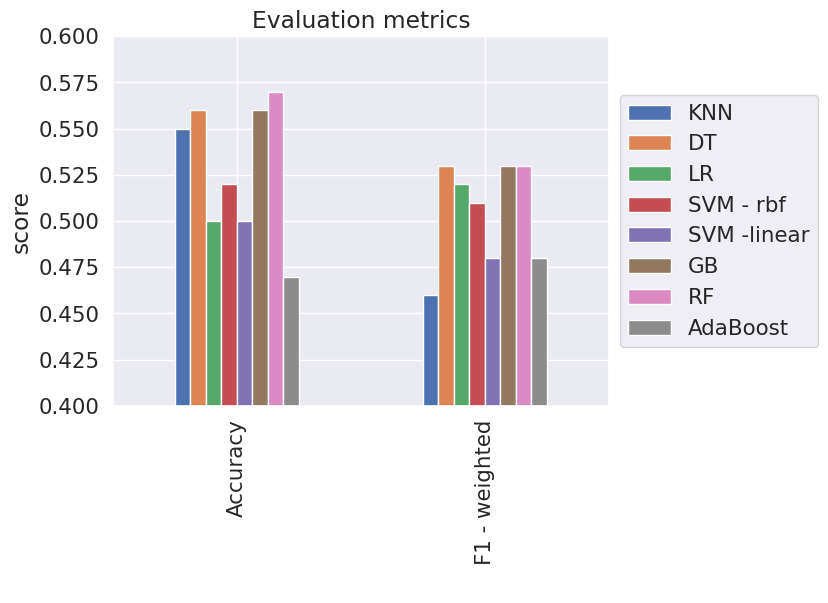

In [ ]:

df2 = pd.DataFrame([ ['Accuracy', 0.55, 0.56, 0.5, 0.52, 0.5, 0.56, 0.57, 0.47],
                   ['F1 - weighted', 0.46, 0.53, 0.52, 0.51, 0.48, 0.53, 0.53, 0.48]],
                  columns=[' ', 'KNN', 'DT', 'LR', 'SVM - rbf', 'SVM -linear', 'GB', 'RF', 'AdaBoost'])


# plot grouped bar chart
df2.plot(x=' ',
        kind='bar',
        stacked=False,
        title='Evaluation metrics', legend = 'reversed', ylabel = 'score', ylim = (0.4, 0.6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
